# Are there factors that can affect one's eating habits?

In [886]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sqlalchemy import create_engine

In [887]:
pd.set_option('display.max_rows', 3000)

In [888]:
# Importing the data into a dataframe

df = pd.read_csv('food_coded.csv')


In [889]:
weight_df =  df[['eating_changes_coded1','GPA','exercise','cook','eating_out','employment','income','life_rewarding','sports','weight']]

weight_df


,eating_changes_coded1,GPA,exercise,cook,eating_out,employment,income,life_rewarding,sports,weight
0,1,2.4,1,2,3,3,5,1,1,187
1,2,3.654,1,3,2,2,4,1,1,155
2,3,3.3,2,1,2,3,6,7,2,I'm not answering this.
3,3,3.2,3,2,2,3,6,2,2,"Not sure, 240"
4,4,3.5,1,1,2,2,6,1,1,190
5,3,2.25,2,3,1,3,1,4,2,190
6,5,3.8,1,2,2,3,4,8,1,180
7,5,3.3,2,3,2,2,5,3,2,137
8,8,3.3,nan,3,5,2,5,8,2,180
9,3,3.3,1,3,3,3,4,3,1,125


In [890]:
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
eating_changes_coded1    125 non-null int64
GPA                      123 non-null object
exercise                 112 non-null float64
cook                     122 non-null float64
eating_out               125 non-null int64
employment               116 non-null float64
income                   124 non-null float64
life_rewarding           124 non-null float64
sports                   123 non-null float64
weight                   123 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 9.8+ KB


In [891]:
# checking to see which columns do not have numerical values

weight_df_null = weight_df.isnull().sum()*100/weight_df.isnull().count()
weight_df_null.sort_values()


eating_changes_coded1    0
eating_out               0
income                   1
life_rewarding           1
GPA                      2
sports                   2
weight                   2
cook                     2
employment               7
exercise                10
dtype: float64

In [892]:
new_exercise_column = pd.DataFrame(weight_df['exercise'].fillna(weight_df['exercise'].mean(),inplace=False))
new_exercise_column = np.round(new_exercise_column, decimals=2)


weight_df = weight_df.drop('exercise', axis=1)
weight_df.insert(2,'exercise',new_exercise_column, True)


weight_df.update(weight_df.replace('3.79 bitch',3.79, inplace=False))
weight_df['GPA'] = weight_df['GPA'].drop([61, 104], inplace=False)
weight_df['GPA'] = weight_df['GPA'].astype(float)

new_GPA_column = pd.DataFrame(weight_df['GPA'].fillna(weight_df['GPA'].mean(),inplace=False))
new_GPA_column = np.round(new_GPA_column, decimals=2)

weight_df = weight_df.drop('GPA', axis=1)
weight_df.insert(1,'GPA',new_GPA_column, True)


In [893]:
weight_df

,eating_changes_coded1,GPA,exercise,cook,eating_out,employment,income,life_rewarding,sports,weight
0,1,2,1,2,3,3,5,1,1,187
1,2,4,1,3,2,2,4,1,1,155
2,3,3,2,1,2,3,6,7,2,I'm not answering this.
3,3,3,3,2,2,3,6,2,2,"Not sure, 240"
4,4,4,1,1,2,2,6,1,1,190
5,3,2,2,3,1,3,1,4,2,190
6,5,4,1,2,2,3,4,8,1,180
7,5,3,2,3,2,2,5,3,2,137
8,8,3,2,3,5,2,5,8,2,180
9,3,3,1,3,3,3,4,3,1,125


In [894]:
new_employment_column    = pd.DataFrame(weight_df['employment'].fillna(weight_df['employment'].mean(),inplace=False))
new_income_column        = pd.DataFrame(weight_df['income'].fillna(weight_df['income'].mean(),inplace=False))
new_lifeRewarding_column = pd.DataFrame(weight_df['life_rewarding'].fillna(weight_df['life_rewarding'].mean(),inplace=False))
new_sports_column        = pd.DataFrame(weight_df['sports'].fillna(weight_df['sports'].mean(),inplace=False))
new_cook_column          = pd.DataFrame(weight_df['cook'].fillna(weight_df['cook'].mean(),inplace=False))

new_employment_column = np.round(new_employment_column, decimals=1)
new_income_column = np.round(new_income_column, decimals=1)
new_lifeRewarding_column = np.round(new_lifeRewarding_column, decimals=1)
new_sports_column = np.round(new_sports_column, decimals=1)
new_cook_column  = np.round(new_cook_column, decimals=1)

weight_df = weight_df.drop('employment', axis=1)
weight_df = weight_df.drop('income', axis=1)
weight_df = weight_df.drop('life_rewarding', axis=1)
weight_df = weight_df.drop('sports', axis=1)
weight_df = weight_df.drop('cook', axis=1)

weight_df.insert(5,'employment',new_employment_column, True)
weight_df.insert(6,'income',new_income_column, True)
weight_df.insert(7,'life_rewarding',new_lifeRewarding_column, True)
weight_df.insert(8,'sports',new_sports_column, True)
weight_df.insert(3,'cook',new_cook_column,True )


weight_df.update(weight_df.replace('Not sure, 240',240, inplace=False))
weight_df.update(weight_df.replace('144 lbs',144, inplace=False))

weight_df['weight'] = weight_df['weight'].drop([2], inplace=False)





In [895]:
weight_df

,eating_changes_coded1,GPA,exercise,cook,eating_out,weight,employment,income,life_rewarding,sports
0,1,2,1,2,3,187,3,5,1,1
1,2,4,1,3,2,155,2,4,1,1
2,3,3,2,1,2,NaN,3,6,7,2
3,3,3,3,2,2,240,3,6,2,2
4,4,4,1,1,2,190,2,6,1,1
5,3,2,2,3,1,190,3,1,4,2
6,5,4,1,2,2,180,3,4,8,1
7,5,3,2,3,2,137,2,5,3,2
8,8,3,2,3,5,180,2,5,8,2
9,3,3,1,3,3,125,3,4,3,1


In [896]:
new_weight_column = weight_df['weight'].fillna(0)

weight_df['weight'].update(new_weight_column)

weight_df["weight"] = weight_df["weight"].astype(int)

last_updated_weight = weight_df['weight'].replace(0, weight_df['weight'].mean(), inplace=False )

weight_df['weight'].update(last_updated_weight)


In [897]:
weight_df

,eating_changes_coded1,GPA,exercise,cook,eating_out,weight,employment,income,life_rewarding,sports
0,1,2,1,2,3,187,3,5,1,1
1,2,4,1,3,2,155,2,4,1,1
2,3,3,2,1,2,155,3,6,7,2
3,3,3,3,2,2,240,3,6,2,2
4,4,4,1,1,2,190,2,6,1,1
5,3,2,2,3,1,190,3,1,4,2
6,5,4,1,2,2,180,3,4,8,1
7,5,3,2,3,2,137,2,5,3,2
8,8,3,2,3,5,180,2,5,8,2
9,3,3,1,3,3,125,3,4,3,1


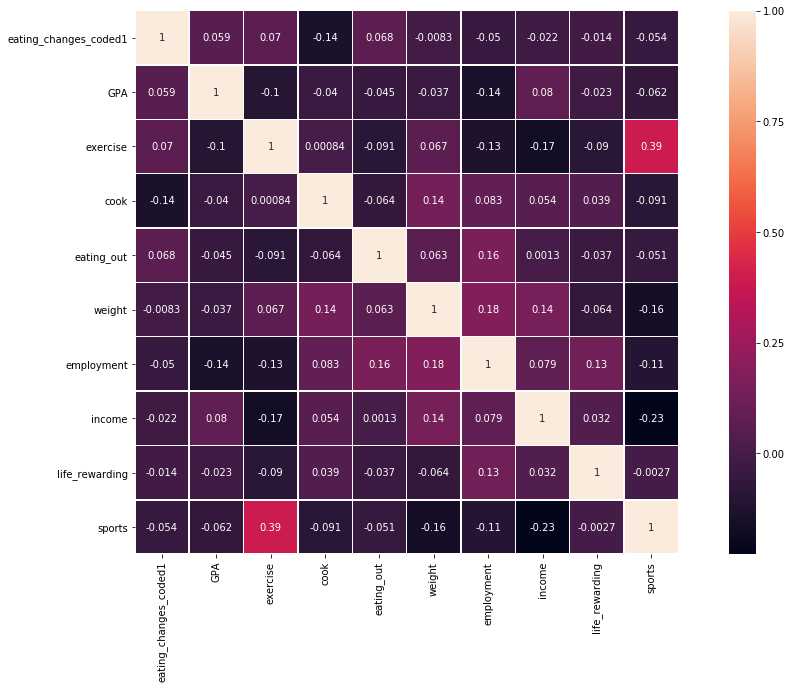

In [898]:
weight_corr = weight_df.corr()

plt.figure(figsize=(18,10))

sns.heatmap(weight_corr,square=True,annot=True,linewidth=.5)
plt.show()

In [899]:
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
eating_changes_coded1    125 non-null int64
GPA                      125 non-null float64
exercise                 125 non-null float64
cook                     125 non-null float64
eating_out               125 non-null int64
weight                   125 non-null float64
employment               125 non-null float64
income                   125 non-null float64
life_rewarding           125 non-null float64
sports                   125 non-null float64
dtypes: float64(8), int64(2)
memory usage: 9.8 KB


# look into cleaning type_sports so you can make dummy variables or simply clean up till you can use as a feature 

In [908]:
for column_name in weight_df['eating_changes_coded1','exercise','cook','grade_level','income','sports','GPA','Gender']:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in df[column_name]:
        try:
            float(value)
        except:
            print(value)


KeyError: ('eating_changes_coded1', 'exercise', 'cook', 'grade_level', 'income', 'sports', 'GPA', 'Gender')

# 1st trial

In [909]:
Y = weight_df['eating_changes_coded1']

X = weight_df[['GPA','exercise','cook','eating_out','weight','employment','income','life_rewarding','sports']]

lrm = linear_model.LinearRegression()

lrm.fit(X , Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)




Coefficients: 
 [ 0.38788568  0.49008506 -0.3377108   0.16473844 -0.0006595  -0.18531696
 -0.03861918  0.00857714 -0.61185431]

Intercept: 
 4.506459875798658


In [910]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\brian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     eating_changes_coded1   R-squared:                       0.044
Model:                               OLS   Adj. R-squared:                 -0.031
Method:                    Least Squares   F-statistic:                    0.5904
Date:                   Sun, 31 May 2020   Prob (F-statistic):              0.803
Time:                           16:19:17   Log-Likelihood:                -290.95
No. Observations:                    125   AIC:                             601.9
Df Residuals:                        115   BIC:                             630.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5065      3.149      1.431      0.155      -1.730      10.743
GPA                0.3879      0.619      0.627      0.532      -0.838       1.614
exercise           0.4901      0.414      1.184      0.239      -0.330       1.310
cook              -0.3377      0.231     -1.463      0.146      -0.795       0.120
eating_out         0.1647      0.209      0.789      0.432      -0.249       0.578
weight            -0.0007      0.008     -0.086      0.932      -0.016       0.015
employment        -0.1853      0.480     -0.386      0.700      -1.136       0.766
income            -0.0386      0.167     -0.231      0.818      -0.370       0.292
life_rewarding     0.0086      0.076      0.113      0.910      -0.142       0.159
sports            -0.6119      0.538     -1.137      0.258      -1.678       0.454
==============================================================================
Omnibus:                       31.755   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.765
Skew:                           1.345   Prob(JB):                     1.15e-10
Kurtosis:                       4.245   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2nd trial

In [911]:
Y = weight_df['eating_changes_coded1']

X = weight_df[['exercise','cook','employment','sports']]

lrm = linear_model.LinearRegression()

lrm.fit(X , Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)




Coefficients: 
 [ 0.44423377 -0.35975287 -0.17895063 -0.59811596]

Intercept: 
 6.117774751165279


In [912]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\brian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     eating_changes_coded1   R-squared:                       0.036
Model:                               OLS   Adj. R-squared:                  0.003
Method:                    Least Squares   F-statistic:                     1.106
Date:                   Sun, 31 May 2020   Prob (F-statistic):              0.357
Time:                           16:19:25   Log-Likelihood:                -291.51
No. Observations:                    125   AIC:                             593.0
Df Residuals:                        120   BIC:                             607.2
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1178      1.542      3.967      0.000       3.064       9.172
exercise       0.4442      0.396      1.121      0.264      -0.340       1.229
cook          -0.3598      0.224     -1.603      0.112      -0.804       0.085
employment    -0.1790      0.451     -0.397      0.692      -1.071       0.713
sports        -0.5981      0.514     -1.164      0.247      -1.615       0.419
==============================================================================
Omnibus:                       32.358   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.061
Skew:                           1.363   Prob(JB):                     6.04e-11
Kurtosis:                       4.265   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3rd trial with  interaction between features:


In [913]:
weight_df['exercise_cook'] = weight_df['exercise'] * weight_df['cook']

In [914]:
Y = weight_df['eating_changes_coded1']

X = weight_df[['exercise','cook','weight','income','life_rewarding','sports','exercise_cook']]

lrm = linear_model.LinearRegression()

lrm.fit(X , Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)



Coefficients: 
 [ 0.76650861 -0.21346006 -0.00081419 -0.04249066  0.00432194 -0.63697155
 -0.10458115]

Intercept: 
 5.577606387754484


In [915]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\brian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     eating_changes_coded1   R-squared:                       0.036
Model:                               OLS   Adj. R-squared:                 -0.022
Method:                    Least Squares   F-statistic:                    0.6156
Date:                   Sun, 31 May 2020   Prob (F-statistic):              0.742
Time:                           16:32:52   Log-Likelihood:                -291.51
No. Observations:                    125   AIC:                             599.0
Df Residuals:                        117   BIC:                             621.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.5776      2.329      2.395      0.018       0.966      10.189
exercise           0.7665      1.161      0.660      0.511      -1.534       3.067
cook              -0.2135      0.571     -0.374      0.709      -1.344       0.917
weight            -0.0008      0.008     -0.108      0.914      -0.016       0.014
income            -0.0425      0.167     -0.254      0.800      -0.374       0.289
life_rewarding     0.0043      0.076      0.057      0.955      -0.146       0.155
sports            -0.6370      0.539     -1.182      0.240      -1.704       0.430
exercise_cook     -0.1046      0.370     -0.283      0.778      -0.837       0.628
==============================================================================
Omnibus:                       31.309   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.738
Skew:                           1.339   Prob(JB):                     1.93e-10
Kurtosis:                       4.191   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  4th trial 

In [916]:
Y = weight_df['eating_changes_coded1']

X = weight_df[['exercise','sports']]

lrm = linear_model.LinearRegression()

lrm.fit(X , Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)




Coefficients: 
 [ 0.43390812 -0.50367325]

Intercept: 
 4.562671088941961


In [917]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\brian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     eating_changes_coded1   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                 -0.003
Method:                    Least Squares   F-statistic:                    0.7844
Date:                   Sun, 31 May 2020   Prob (F-statistic):              0.459
Time:                           16:39:23   Log-Likelihood:                -292.97
No. Observations:                    125   AIC:                             591.9
Df Residuals:                        122   BIC:                             600.4
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5627      0.778      5.863      0.000       3.022       6.103
exercise       0.4339      0.395      1.097      0.275      -0.349       1.217
sports        -0.5037      0.512     -0.983      0.327      -1.518       0.510
==============================================================================
Omnibus:                       37.295   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.221
Skew:                           1.476   Prob(JB):                     1.38e-13
Kurtosis:                       4.631   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4th trial with interaction between features:

In [918]:
weight_df['exercise_sports'] = weight_df['exercise'] * weight_df['sports']

In [919]:
Y = weight_df['eating_changes_coded1']

X = weight_df[['exercise','sports','exercise_sports']]

lrm = linear_model.LinearRegression()

lrm.fit(X , Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)




Coefficients: 
 [ 1.43246103  0.69661348 -0.71161842]

Intercept: 
 2.963323093356685


In [920]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\brian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     eating_changes_coded1   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                 -0.005
Method:                    Least Squares   F-statistic:                    0.7805
Date:                   Sun, 31 May 2020   Prob (F-statistic):              0.507
Time:                           16:42:14   Log-Likelihood:                -292.57
No. Observations:                    125   AIC:                             593.1
Df Residuals:                        121   BIC:                             604.5
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9633      1.976      1.500      0.136      -0.949       6.876
exercise            1.4325      1.201      1.193      0.235      -0.945       3.810
sports              0.6966      1.456      0.478      0.633      -2.186       3.580
exercise_sports    -0.7116      0.808     -0.881      0.380      -2.311       0.888
==============================================================================
Omnibus:                       38.593   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.807
Skew:                           1.504   Prob(JB):                     2.30e-14
Kurtosis:                       4.736   Cond. No.                         43.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""